# Health Data Set Analysis 2 - Shane

This note book analizes health varaibales for smoking, flue vaccination, and child mortality.

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
health_df_raw = pd.read_csv("../data/county_health.csv", 
                            low_memory=False)

In [3]:
nrows, ncols, = health_df_raw.shape
print(f"There are {nrows} rows and {ncols} columns in the data frame.")

There are 3195 rows and 786 columns in the data frame.


In [4]:
list(health_df_raw)

['State FIPS Code',
 'County FIPS Code',
 '5-digit FIPS Code',
 'State Abbreviation',
 'Name',
 'Release Year',
 'County Ranked (Yes=1/No=0)',
 'Premature death raw value',
 'Premature death numerator',
 'Premature death denominator',
 'Premature death CI low',
 'Premature death CI high',
 'Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed)',
 'Premature death (AIAN)',
 'Premature death CI low (AIAN)',
 'Premature death CI high (AIAN)',
 'Premature death flag (AIAN) (. = No Flag/1=Unreliable/2=Suppressed)',
 'Premature death (Asian/Pacific Islander)',
 'Premature death CI low (Asian/Pacific Islander)',
 'Premature death CI high (Asian/Pacific Islander)',
 'Premature death flag (Asian/Pacific Islander) (. = No Flag/1=Unreliable/2=Suppressed)',
 'Premature death (Black)',
 'Premature death CI low (Black)',
 'Premature death CI high (Black)',
 'Premature death flag (Black) (. = No Flag/1=Unreliable/2=Suppressed)',
 'Premature death (Hispanic)',
 'Premature death CI low (Hispanic

In [5]:
columns = ['State FIPS Code', 'County FIPS Code', 
           '5-digit FIPS Code', 'State Abbreviation', 'Name', 
           'Adult smoking raw value', 'Flu vaccinations raw value', 'Child mortality raw value','Life expectancy raw value']

health_df = health_df_raw[columns]
health_df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Adult smoking raw value,Flu vaccinations raw value,Child mortality raw value,Life expectancy raw value
0,statecode,countycode,fipscode,state,county,v009_rawvalue,v155_rawvalue,v128_rawvalue,v147_rawvalue
1,0,0,0,US,United States,0.170800174,0.46,49.93848723,79.08913021
2,1,0,1000,AL,Alabama,0.209273531,0.41,69.4996753,75.41619415
3,1,1,1001,AL,Autauga County,0.180815572,0.41,55.92215636,76.87947717
4,1,3,1003,AL,Baldwin County,0.174890326,0.44,47.38174986,78.45025837


In [6]:
col_rename = {
    'State FIPS Code' : 'state_fips', 
    'County FIPS Code' : 'county_fips',
    '5-digit FIPS Code' : 'fips5', 
    'State Abbreviation' : 'state_abbreviation', 
    'Name' : 'name', 
    'Adult smoking raw value':'adult_smoking_value', 'Flu vaccinations raw value':'flu_vaccinations_value',
    'Child mortality raw value':'child_mortality_value','Life expectancy raw value' : 'life_exp'
}

health_df = health_df.rename(columns = col_rename).drop(0)
health_df.head()

,state_fips,county_fips,fips5,state_abbreviation,name,adult_smoking_value,flu_vaccinations_value,child_mortality_value,life_exp
1,0,0,0,US,United States,0.170800174,0.46,49.93848723,79.08913021
2,1,0,1000,AL,Alabama,0.209273531,0.41,69.4996753,75.41619415
3,1,1,1001,AL,Autauga County,0.180815572,0.41,55.92215636,76.87947717
4,1,3,1003,AL,Baldwin County,0.174890326,0.44,47.38174986,78.45025837
5,1,5,1005,AL,Barbour County,0.219999845,0.37,74.22527371,75.34193493


In [7]:
health_df['fips5'].astype(int).max()

56045

In [8]:
state_fips = [str(n) for n in range(0,57000, 1000)]
state_filter = health_df['fips5'].isin(state_fips)
health_df_state = health_df[state_filter]
health_df_state

,state_fips,county_fips,fips5,state_abbreviation,name,adult_smoking_value,flu_vaccinations_value,child_mortality_value,life_exp
1,0,0,0,US,United States,0.170800174,0.46,49.93848723,79.08913021
2,1,0,1000,AL,Alabama,0.209273531,0.41,69.4996753,75.41619415
70,2,0,2000,AK,Alaska,0.210078537,0.35,67.75898278,78.7721508
100,4,0,4000,AZ,Arizona,0.15555003,0.44,49.0621759,79.89649908
116,5,0,5000,AR,Arkansas,0.222862588,0.45,68.28485818,75.93061174
192,6,0,6000,CA,California,0.113362627,0.41,36.79971277,81.57580635
251,8,0,8000,CO,Colorado,0.146295048,0.48,44.35631319,80.5002804
316,9,0,9000,CT,Connecticut,0.127309806,0.53,35.07575161,80.86944868
325,10,0,10000,DE,Delaware,0.170300597,0.54,57.5444439,78.42865496
329,11,0,11000,DC,District of Columbia,0.159655922,0.38,81.46871805,78.5919757


In [9]:
numeric_cols = [
    'adult_smoking_value', 'flu_vaccinations_value', 'child_mortality_value','life_exp', "fips5"
]

health_df[numeric_cols] = health_df[numeric_cols].apply(pd.to_numeric)

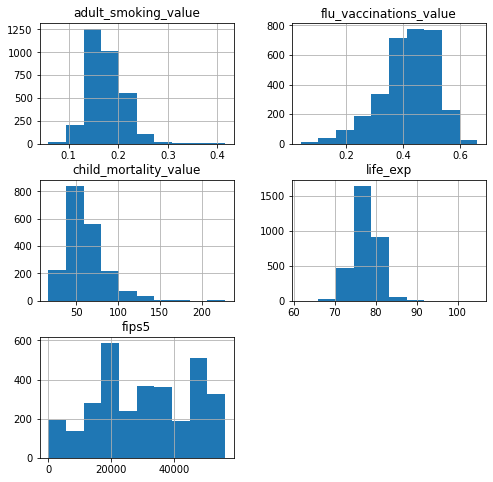

In [10]:
health_df[numeric_cols].hist(figsize=(8,8))
plt.show()

In [11]:
health_df[numeric_cols].describe().round(3)

,adult_smoking_value,flu_vaccinations_value,child_mortality_value,life_exp,fips5
count,3194.000,3176.000,1963.000,3121.000,3194.000
mean,0.175,0.418,61.506,77.486,30351.417
std,0.036,0.097,23.833,3.026,15179.046
min,0.059,0.040,16.567,61.626,0.000
25%,0.149,0.360,45.792,75.571,18171.500
50%,0.170,0.430,56.845,77.510,29174.000
75%,0.197,0.490,71.953,79.369,45074.500
max,0.415,0.660,227.832,104.740,56045.000


In [12]:
health_df.set_index('name')[numeric_cols].aggregate(['idxmin', 'idxmax'])

,adult_smoking_value,flu_vaccinations_value,child_mortality_value,life_exp,fips5
idxmin,Utah County,Nome Census Area,Marin County,Buffalo County,United States
idxmax,Todd County,Story County,Northwest Arctic Borough,San Miguel County,Weston County


In [13]:
state_means_df=health_df[-state_filter].groupby('state_abbreviation')[numeric_cols].mean()

In [14]:
state_means_df.loc['CT']

adult_smoking_value          0.118736
flu_vaccinations_value       0.538750
child_mortality_value       33.036028
life_exp                    80.607635
fips5                     9008.000000
Name: CT, dtype: float64

In [15]:
health_df[health_df['fips5']=='1000'][numeric_cols]

,adult_smoking_value,flu_vaccinations_value,child_mortality_value,life_exp,fips5


In [16]:
health_df.to_csv(r'../data/health_clean_smoking_flu.csv', index = False)

In [17]:
health_df_state = health_df[-state_filter].groupby('state_abbreviation')[['adult_smoking_value', 'flu_vaccinations_value', 'child_mortality_value','life_exp']].mean()
health_df_state.head()

,adult_smoking_value,flu_vaccinations_value,child_mortality_value,life_exp
state_abbreviation,,,,
AK,0.208064,0.283750,116.189037,78.053287
AL,0.199892,0.385075,76.312266,74.644740
AR,0.203888,0.408000,80.722863,74.906292
AZ,0.164839,0.380000,60.886541,78.521663
CA,0.120916,0.393276,41.466492,80.308461


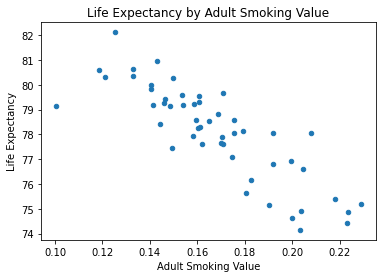

In [18]:
health_df_state.plot(kind='scatter', 
                     x = 'adult_smoking_value', 
                     y = 'life_exp')
plt.xlabel("Adult Smoking Value")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy by Adult Smoking Value")
plt.show()

In [19]:
health_df_state[['adult_smoking_value','life_exp']].corr()

,adult_smoking_value,life_exp
adult_smoking_value,1.0000,-0.8468
life_exp,-0.8468,1.0000


In [20]:
health_df_state.abs().aggregate(['max', 'min'])

,adult_smoking_value,flu_vaccinations_value,child_mortality_value,life_exp
max,0.228826,0.54000,116.189037,82.115803
min,0.100496,0.28375,33.036028,74.146700


In [21]:
health_df_state.abs().aggregate(['idxmax', 'idxmin'])

,adult_smoking_value,flu_vaccinations_value,child_mortality_value,life_exp
idxmax,WV,DE,AK,HI
idxmin,UT,AK,CT,MS


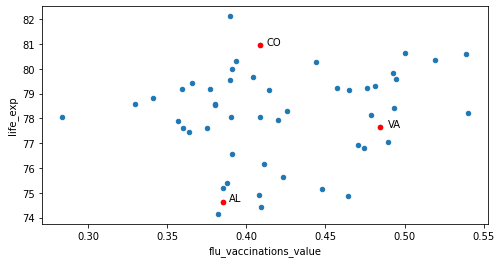

In [22]:
states_to_highlight = ['AL', 'CO', 'VA']

splot = health_df_state.abs().plot(kind='scatter', 
                     x = 'flu_vaccinations_value', 
                     y = 'life_exp',
                     figsize=(8,4)
                                  )

highlights = health_df_state.abs().loc[states_to_highlight]


highlights.plot(kind='scatter',
                x = 'flu_vaccinations_value', 
                y = 'life_exp',
                color='red',
                ax=splot
)

highlights.reset_index().apply(lambda r: plt.text(r['flu_vaccinations_value']*1.01,
                                    r['life_exp'],
                                    r['state_abbreviation']
                                   ), axis=1)

plt.show()